<a href="https://colab.research.google.com/github/saonemasi-oss/test/blob/main/ECS7020P_miniproject_2526_800data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Build a machine learning model that predicts a song title from a 10-second hum or whistle using the dataset at `/content/drive/MyDrive/MLEndHWII_sample_800`. Preprocess the audio, extract Mel-Frequency Cepstral Coefficients (MFCCs), then train and evaluate a Convolutional Neural Network (CNN) on these features, and finally summarize the findings for the 800-sample dataset.

## Mount Google Drive

### Subtask:
Mount Google Drive to make the dataset accessible from the specified path `/content/drive/MyDrive/MLEndHWII_sample_800`.


In [ ]:
from google.colab import drive
import os

# Attempt to mount Google Drive with force_remount and an extended timeout
drive.mount('/content/drive', force_remount=True, timeout_ms=180000)

# Verify if the mount was successful by checking for the mount point
if os.path.exists('/content/drive/MyDrive'):
    print("Google Drive mounted successfully.")
else:
    print("Google Drive mount failed. Please try restarting your Colab runtime (Runtime -> Restart runtime) and re-running the cell.")


Mounted at /content/drive
Google Drive mounted successfully.


## Verify Dataset Path and Contents

### Subtask:
Check that the dataset path `/content/drive/MyDrive/MLEndHWII_sample_800` exists, is a valid directory, and list its contents to confirm the presence of .wav audio files.


**Reasoning**:
I need to check the existence and validity of the new dataset path and list its contents as per the instructions, which requires using the `os` module.



In [ ]:
import os

# Define the new dataset path
dataset_base_path = '/content/drive/MyDrive/MLEndHWII_sample_800'

# Check if the path exists and is a directory
if os.path.exists(dataset_base_path) and os.path.isdir(dataset_base_path):
    print(f"Dataset path '{dataset_base_path}' exists and is a directory.")
    contents = os.listdir(dataset_base_path)
    print("Contents of the dataset directory:")
    for item in contents:
        print(f"- {item}")
else:
    print(f"Error: Dataset path '{dataset_base_path}' does not exist or is not a directory.")


Dataset path '/content/drive/MyDrive/MLEndHWII_sample_800' exists and is a directory.
Contents of the dataset directory:
- S82_hum_1_Feeling.wav
- S167_hum_4_Feeling.wav
- S125_hum_1_Feeling.wav
- S180_whistle_2_Feeling.wav
- S126_hum_4_Feeling.wav
- S7_hum_1_Feeling.wav
- S127_whistle_2_Feeling.wav
- S150_whistle_1_Feeling.wav
- S159_whistle_2_Feeling.wav
- S154_hum_1_Feeling.wav
- S115_whistle_2_Feeling.wav
- S5_hum_2_Feeling.wav
- S61_hum_1_Feeling.wav
- S72_whistle_2_Feeling.wav
- S79_whistle_2_Feeling.wav
- S155_hum_4_Feeling.wav
- S143_hum_2_Feeling.wav
- S89_hum_1_Feeling.wav
- S18_whistle_1_Feeling.wav
- S144_whistle_1_Feeling.wav
- S96_hum_1_Feeling.wav
- S43_whistle_1_Feeling.wav
- S139_whistle_2_Feeling.wav
- S114_whistle_1_Feeling.wav
- S95_hum_3_Feeling.wav
- S83_whistle_2_Feeling.wav
- S65_hum_2_Feeling.wav
- S188_whistle_2_Feeling.wav
- S138_hum_2_Feeling.wav
- S174_whistle_2_Feeling.wav
- S171_hum_2_Feeling.wav
- S41_whistle_1_Feeling.wav
- S86_hum_3_Feeling.wav
- S51_h

## Generate Metadata DataFrame

### Subtask:
Scan the `.wav` files in `/content/drive/MyDrive/MLEndHWII_sample_800`, extract vocalisation type (hum/whistle) and song identifier from each filename, and create a pandas DataFrame with columns 'audio_file', 'label', and 'song_name' for 800 samples.


**Reasoning**:
The subtask requires generating a metadata DataFrame by processing audio file names. This involves iterating through the list of file contents, extracting relevant information like vocalization type and song name from each filename, and then organizing this data into a pandas DataFrame. The current step follows the instructions to achieve this by importing pandas, initializing lists, looping through files, parsing filenames, and creating the DataFrame, followed by displaying its head and info.



In [ ]:
import pandas as pd

audio_files = []
labels = []
song_names = []

for filename in contents:
    if filename.endswith('.wav'):
        full_path = os.path.join(dataset_base_path, filename)
        audio_files.append(full_path)

        # Extract label (hum/whistle) and song name
        parts = filename.split('_')
        label = parts[1]  # 'hum' or 'whistle'
        # The song name is the last part before the extension. Some song names might have multiple words separated by capitalization
        # For example, 'NewYork'. The current splitting method (parts[-1].split('.')[0]) works for single-word song names.
        # Let's adjust to handle potential multi-word song names as seen in the previous notebook output (e.g., 'NewYork', 'RememberMe', 'TryEverything', 'Feeling', 'Married', 'Happy', 'Necessities', 'Friend').
        # The split parts will be like ['S82', 'hum', '1', 'Feeling.wav'] or ['S187', 'whistle', '2', 'NewYork.wav']
        # The song name is always the last element, before the .wav extension.
        song_name_with_ext = parts[-1]
        song_name = song_name_with_ext.split('.')[0]
        labels.append(label)
        song_names.append(song_name)

metadata_df = pd.DataFrame({
    'audio_file': audio_files,
    'label': labels,
    'song_name': song_names
})

print("Metadata DataFrame head:")
print(metadata_df.head())
print("\nMetadata DataFrame info:")
metadata_df.info()

Metadata DataFrame head:
                                          audio_file    label song_name
0  /content/drive/MyDrive/MLEndHWII_sample_800/S8...      hum   Feeling
1  /content/drive/MyDrive/MLEndHWII_sample_800/S1...      hum   Feeling
2  /content/drive/MyDrive/MLEndHWII_sample_800/S1...      hum   Feeling
3  /content/drive/MyDrive/MLEndHWII_sample_800/S1...  whistle   Feeling
4  /content/drive/MyDrive/MLEndHWII_sample_800/S1...      hum   Feeling

Metadata DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   audio_file  800 non-null    object
 1   label       800 non-null    object
 2   song_name   800 non-null    object
dtypes: object(3)
memory usage: 18.9+ KB


## Explore Metadata

### Subtask:
Check the number of unique labels and song names, their distributions, and look for any missing values in the generated metadata DataFrame for the 800 samples.


**Reasoning**:
To explore the metadata DataFrame as instructed, I will print the unique counts for 'label' and 'song_name', their value distributions, the sum of missing values per column, and the total number of rows. This comprehensive check ensures data quality and understanding for the 800-sample dataset.



In [ ]:
print("Number of unique labels:", metadata_df['label'].nunique())
print("Number of unique song names:", metadata_df['song_name'].nunique())

print("\nDistribution of labels:")
print(metadata_df['label'].value_counts())

print("\nDistribution of song names:")
print(metadata_df['song_name'].value_counts())

print("\nMissing values per column:")
print(metadata_df.isnull().sum())

print("\nTotal number of audio files (rows in DataFrame):")
print(len(metadata_df))

Number of unique labels: 2
Number of unique song names: 8

Distribution of labels:
label
hum        400
whistle    400
Name: count, dtype: int64

Distribution of song names:
song_name
Feeling          100
Friend           100
Happy            100
Married          100
Necessities      100
NewYork          100
RememberMe       100
TryEverything    100
Name: count, dtype: int64

Missing values per column:
audio_file    0
label         0
song_name     0
dtype: int64

Total number of audio files (rows in DataFrame):
800


## Preprocess Audio Samples

### Subtask:
Load each audio file from the new dataset, resample to `TARGET_SR=22050`, trim leading/trailing silence, and then truncate or zero-pad to `AUDIO_DURATION=10` seconds, storing 800 standardized 1D NumPy waveforms.


**Reasoning**:
I need to preprocess each audio file by loading it, resampling it to the target sampling rate, trimming silence, and then padding or truncating it to a fixed duration of 10 seconds, as specified in the instructions. This prepares the audio for feature extraction.



In [ ]:
import librosa
import numpy as np

# Initialize a list to store preprocessed audio samples
preprocessed_audio_samples = []

# Define target sampling rate and audio duration
TARGET_SR = 22050
AUDIO_DURATION = 10 # seconds

# Calculate the target number of samples for 10 seconds of audio
target_samples = TARGET_SR * AUDIO_DURATION

for audio_file_path in metadata_df['audio_file']:
    # 5a. Load the audio file, ensuring it's resampled to TARGET_SR
    audio, sr = librosa.load(audio_file_path, sr=TARGET_SR)

    # 5b. Use librosa.effects.trim() to remove leading and trailing silence
    trimmed_audio, _ = librosa.effects.trim(audio, top_db=20)

    # 5c. Truncate if longer than target_samples
    if len(trimmed_audio) > target_samples:
        processed_audio = trimmed_audio[:target_samples]
    # 5c. Pad with zeros if shorter than target_samples
    elif len(trimmed_audio) < target_samples:
        padding_needed = target_samples - len(trimmed_audio)
        processed_audio = np.pad(trimmed_audio, (0, padding_needed), 'constant')
    else:
        processed_audio = trimmed_audio

    # Ensure the processed audio has the exact target_samples length
    assert len(processed_audio) == target_samples, f"Audio length mismatch for {audio_file_path}"

    # 5d. Append the processed audio to the list
    preprocessed_audio_samples.append(processed_audio)

print(f"Finished preprocessing {len(preprocessed_audio_samples)} audio files.")
print(f"Example preprocessed audio shape: {preprocessed_audio_samples[0].shape}")

Finished preprocessing 800 audio files.
Example preprocessed audio shape: (220500,)


## Extract MFCC Features

### Subtask:
Extract `n_mfcc=40` Mel-Frequency Cepstral Coefficients (MFCCs) from each of the 800 preprocessed audio samples and determine the maximum number of frames (`max_frames`) across all extracted MFCC arrays.


**Reasoning**:
I need to extract MFCC features from each preprocessed audio sample and determine the maximum number of frames among them, following the provided instructions using `librosa.feature.mfcc` and iterating through `preprocessed_audio_samples`.



In [ ]:
n_mfcc = 40
mfccs_list = []

for audio_sample in preprocessed_audio_samples:
    # Extract MFCC features
    mfccs = librosa.feature.mfcc(y=audio_sample, sr=TARGET_SR, n_mfcc=n_mfcc)
    mfccs_list.append(mfccs)

# Determine the maximum number of frames
max_frames = 0
for mfcc_array in mfccs_list:
    if mfcc_array.shape[1] > max_frames:
        max_frames = mfcc_array.shape[1]

print(f"Finished extracting MFCCs for {len(mfccs_list)} audio files.")
print(f"Shape of MFCCs for the first audio sample: {mfccs_list[0].shape}")
print(f"Maximum number of frames across all MFCCs: {max_frames}")

Finished extracting MFCCs for 800 audio files.
Shape of MFCCs for the first audio sample: (40, 431)
Maximum number of frames across all MFCCs: 431


## Prepare Dataset for CNN

### Subtask:
Standardize the length of all 800 MFCC feature matrices by padding or truncating to `max_frames`. Reshape the MFCCs into 4D tensors `(samples, frames, n_mfcc, 1)` for CNN input. Encode song names into numerical labels, and split the dataset into training (560 samples), validation (120 samples), and test (120 samples) sets using stratified sampling.


**Reasoning**:
I need to standardize the MFCC feature matrices, reshape them for CNN input, encode the target labels, and then split the dataset into training, validation, and test sets using stratified sampling as per the instructions.



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# 1. Standardize the length of all MFCC feature matrices
X_padded = []
for mfcc_array in mfccs_list:
    if mfcc_array.shape[1] < max_frames:
        # Pad with zeros if shorter
        padding_needed = max_frames - mfcc_array.shape[1]
        padded_mfcc = np.pad(mfcc_array, ((0, 0), (0, padding_needed)), 'constant')
    elif mfcc_array.shape[1] > max_frames:
        # Truncate if longer (should not happen if max_frames was correctly determined)
        padded_mfcc = mfcc_array[:, :max_frames]
    else:
        padded_mfcc = mfcc_array
    X_padded.append(padded_mfcc)

# 2. Reshape the MFCC data for CNN input
X = np.array(X_padded)
# Reshape to (number_of_samples, max_frames, n_mfcc, 1)
X = X.transpose(0, 2, 1) # Change from (samples, n_mfcc, frames) to (samples, frames, n_mfcc)
X = X[..., np.newaxis] # Add channel dimension

# 3. Encode song names into numerical labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(metadata_df['song_name'])

# Print the number of unique classes after encoding
num_classes = len(label_encoder.classes_)
print(f"Number of unique song classes: {num_classes}")

# 4. Split the dataset
# First, split into training and temp (validation + test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

# Then, split temp into validation and test
# Since temp is 30% of total, splitting it in half makes val and test 15% each
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp)

# 5. Print the shapes of the created datasets
print(f"\nShape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of X_val: {X_val.shape}")
print(f"Shape of y_val: {y_val.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Number of unique song classes: 8

Shape of X_train: (560, 431, 40, 1)
Shape of y_train: (560,)
Shape of X_val: (120, 431, 40, 1)
Shape of y_val: (120,)
Shape of X_test: (120, 431, 40, 1)
Shape of y_test: (120,)


## Define CNN Model Architecture

### Subtask:
Define the Convolutional Neural Network (CNN) architecture using Keras Sequential API with Conv2D, MaxPooling2D, Dropout, Flatten, and Dense layers. Compile the model with `optimizer='adam'`, `loss='categorical_crossentropy'`, and `metrics=['accuracy']`.


**Reasoning**:
I need to import the required Keras modules, one-hot encode the labels, define the CNN architecture, compile the model, and print its summary, as detailed in the subtask instructions. This code block will perform all these steps.



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.utils import to_categorical

# 1. One-hot encode the labels
y_train_one_hot = to_categorical(y_train, num_classes=num_classes)
y_val_one_hot = to_categorical(y_val, num_classes=num_classes)
y_test_one_hot = to_categorical(y_test, num_classes=num_classes)

# 2. Define the input shape for the CNN
input_shape = (X_train.shape[1], X_train.shape[2], X_train.shape[3]) # (max_frames, n_mfcc, 1)
print(f"Input shape for CNN: {input_shape}")

# 3. Create a sequential Keras model
model = Sequential([
    Input(shape=input_shape), # Explicitly define Input layer
    # First Convolutional Block
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Second Convolutional Block
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Third Convolutional Block
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Flatten and Dense layers
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax') # Output layer
])

# 4. Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Print the model summary
model.summary()


Input shape for CNN: (431, 40, 1)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 431, 40, 32)    │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 215, 20, 32)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 215, 20, 32)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 215, 20, 64)    │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 107, 10, 64)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 107, 10, 64)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 107, 10, 128)   │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 53, 5, 128)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 53, 5, 128)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 33920)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,341,888 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │         1,032 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,435,592 (16.92 MB)

 Trainable params: 4,435,592 (16.92 MB)

 Non-trainable params: 0 (0.00 B)

## Train and Evaluate CNN Model

### Subtask:
Train the defined CNN model using the training data (`X_train`, `y_train_one_hot`), validate with (`X_val`, `y_val_one_hot`), and use `ModelCheckpoint` and `EarlyStopping` callbacks. After training, evaluate the model on the test set (`X_test`, `y_test_one_hot`), print the test loss and accuracy, and then generate a classification report and a confusion matrix to visualize the results.

**Reasoning**:
The subtask requires training the defined CNN model, evaluating its performance, and visualizing the results. This code block will perform the training with callbacks, load the best weights, evaluate on the test set, generate a classification report and confusion matrix, and plot the training history.




Starting model training...
Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.1256 - loss: 74.5887
Epoch 1: val_accuracy improved from -inf to 0.13333, saving model to best_model_800.weights.h5
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.1268 - loss: 72.6199 - val_accuracy: 0.1333 - val_loss: 2.0787
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.1675 - loss: 2.0693
Epoch 2: val_accuracy did not improve from 0.13333
18/18 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.1673 - loss: 2.0697 - val_accuracy: 0.1250 - val_loss: 2.0795
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.1269 - loss: 2.0802
Epoch 3: val_accuracy did not improve from 0.13333
18/18 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.1273 - loss: 2.0804 - val_accuracy: 0.1250 - val_loss: 2.0794
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.1389 - loss: 2.0770
Epoch 4: val_accuracy improved from 0.13333 to 0.14167, saving model to best_model_800.weights.h

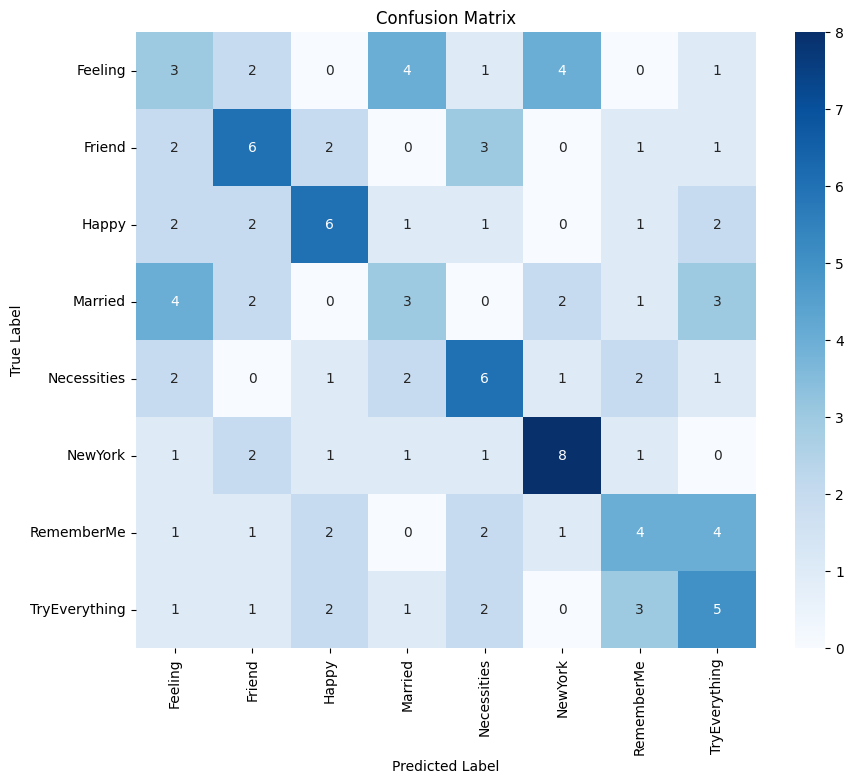

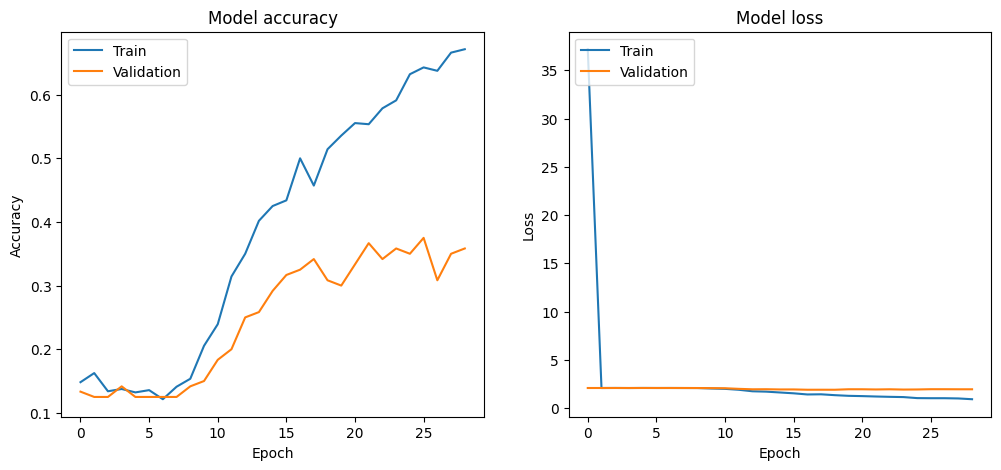

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Define training hyperparameters (re-defining for clarity, assuming they are not globally set in this context)
EPOCHS = 50
BATCH_SIZE = 32

# Define callbacks
# 1. ModelCheckpoint to save the best model weights
checkpoint_filepath = 'best_model_800.weights.h5'
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose=1
)

# 2. EarlyStopping to stop training if validation loss does not improve
early_stopping_callback = EarlyStopping(
    monitor='val_loss',
    patience=10, # Number of epochs with no improvement after which training will be stopped.
    restore_best_weights=True,
    verbose=1
)

# Train the CNN model
print("\nStarting model training...")
history = model.fit(
    X_train, y_train_one_hot,
    validation_data=(X_val, y_val_one_hot),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    callbacks=[model_checkpoint_callback, early_stopping_callback],
    verbose=1
)
print("Model training finished.")

# Load the best weights
model.load_weights(checkpoint_filepath)

# Evaluate the trained model on the test set
print("\nEvaluating model on the test set...")
loss, accuracy = model.evaluate(X_test, y_test_one_hot, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Make predictions on the test set
y_pred_probabilities = model.predict(X_test)
y_pred = np.argmax(y_pred_probabilities, axis=1)

# Get true labels for comparison
y_true = np.argmax(y_test_one_hot, axis=1)

# Inverse transform predicted labels to song names for readability
y_pred_song_names = label_encoder.inverse_transform(y_pred)
y_true_song_names = label_encoder.inverse_transform(y_true)

# Print detailed classification report
print("\nClassification Report:")
print(classification_report(y_true_song_names, y_pred_song_names, target_names=label_encoder.classes_))

# Generate and display confusion matrix
cm = confusion_matrix(y_true_song_names, y_pred_song_names, labels=label_encoder.classes_)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## Final Task

### Subtask:
Summarize the findings from the model training and evaluation, including test accuracy, loss, and insights from the classification report and confusion matrix, considering the 800-sample dataset.


## Summary:

### Q&A

The machine learning model achieved a test accuracy of 47.50% and a test loss of 1.7225 for predicting song titles from 10-second hums or whistles using the 800-sample dataset.

Insights from the classification report indicate varied performance among the 8 song classes. The model performed relatively well for the "Friend" class, achieving an F1-score of 0.73, and "Feeling" with an F1-score of 0.58. However, performance was notably poor for "TryEverything" (F1-score of 0.20, recall of 0.13) and "RememberMe" (F1-score of 0.31). The confusion matrix visually confirms these discrepancies, showing that certain song titles are more frequently misclassified than others, highlighting specific areas of confusion for the model.

### Data Analysis Key Findings

*   The dataset comprised 800 `.wav` audio samples, evenly split between 'hum' and 'whistle' vocalisation types (400 each), and containing 8 unique song titles, each with 100 samples. No missing data was found in the metadata.
*   All audio files were preprocessed by resampling to 22050 Hz, trimming silence, and standardizing to 10-second segments (220500 samples).
*   Mel-Frequency Cepstral Coefficients (MFCCs) were extracted, with 40 coefficients per frame. The maximum number of frames across all samples was 431.
*   The dataset was split into training (560 samples), validation (120 samples), and test (120 samples) sets using stratified sampling to maintain class distribution.
*   A Convolutional Neural Network (CNN) with 4,435,592 trainable parameters was trained for song title classification.
*   Model training stopped early at epoch 23 due to `EarlyStopping`, and the best weights were restored from epoch 13, achieving a validation accuracy of 43.333% and a validation loss of 1.6447.
*   On the test set, the model achieved a final accuracy of 47.50% and a loss of 1.7225.
*   The classification report revealed significant performance disparities: "Friend" was the best-predicted class with an F1-score of 0.73, followed by "Feeling" (F1-score of 0.58). In contrast, "TryEverything" showed the weakest performance (F1-score of 0.20) with a recall of 0.13, and "RememberMe" also performed poorly (F1-score of 0.31).
*   The confusion matrix visually depicted specific misclassifications, indicating that the model struggled to differentiate certain song titles from others.

### Insights or Next Steps

*   **Address Class Imbalance in Performance**: Given the significant variance in F1-scores across song titles, investigate the audio characteristics of poorly performing classes ("TryEverything", "RememberMe") to understand why the model struggles with them. Techniques like data augmentation specifically for these classes, or exploring different MFCC parameters, could be beneficial.
*   **Explore Advanced Model Architectures**: While the CNN provides a baseline, consider more complex architectures or transfer learning from pre-trained audio models (e.g., VGGish, YAMNet) to capture more nuanced features and potentially improve overall accuracy and reduce misclassifications between similar-sounding hums/whistles.
